# Hyperparameter tuning to avoid overfitting

## Load data

In [1]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)
df

,Gender,Age,Married,YearsEmployed,Income,Approved
0,1,30,1,1.25,0,1
1,0,58,1,3.04,560,1
...,...,...,...,...,...,...
688,1,17,1,0.04,750,0
689,1,35,1,8.29,0,0


## Feature selection

In [2]:
target = 'Approved'

y = df[target]
X = df.drop(columns=target)

## Train test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Modelling with default hyperparameters

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
model.score(X_train, y_train)

0.9958592132505176

In [6]:
model.score(X_test, y_test)

0.6473429951690821

## Modelling with custom hyperparameters

In [7]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [8]:
model.score(X_train, y_train)

0.7701863354037267

In [9]:
model.score(X_test, y_test)

0.714975845410628

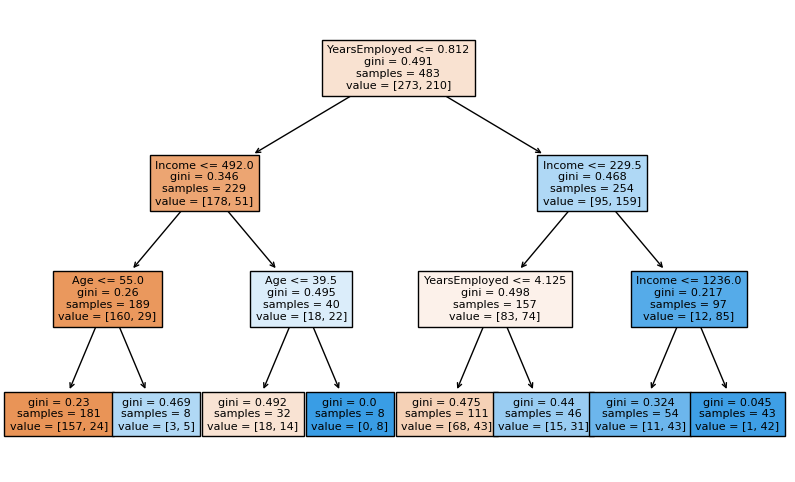

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

feature_names = X.columns.tolist()
plot_tree(model, feature_names=feature_names, filled=True, fontsize=8);

## Modelling with other custom hyperparameters

In [11]:
model = DecisionTreeClassifier(min_samples_leaf=50)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [12]:
model.score(X_train, y_train)

0.7494824016563147

In [13]:
model.score(X_test, y_test)

0.7053140096618358

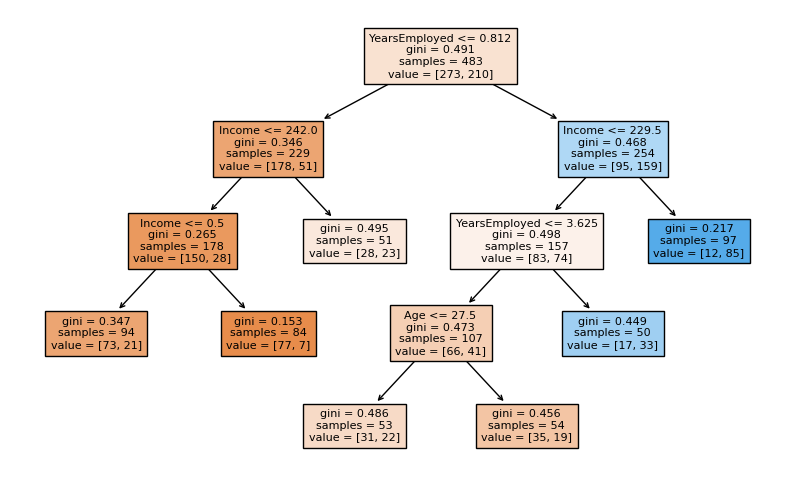

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

feature_names = X.columns.tolist()
plot_tree(model, feature_names=feature_names, filled=True, fontsize=8);

## Grid search to find the best hyperparameters

In [15]:
from sklearn.model_selection import GridSearchCV
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [16]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy']
}

In [18]:
model_grid = GridSearchCV(model, param_grid, verbose=2)
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=200; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_sam

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [50, 100, 200, 500]},
             verbose=2)

In [19]:
param_grid

{'max_depth': [3, 5, 7, 9],
 'min_samples_leaf': [50, 100, 200, 500],
 'criterion': ['gini', 'entropy']}

In [20]:
4 * 4 * 2

32

In [21]:
model_grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100)

In [22]:
model_grid.best_score_

0.7308419243986255

In [23]:
model_grid.score(X_test, y_test)

0.6811594202898551

## Grid search with other models

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

In [26]:
model_grid = GridSearchCV(model, param_grid, verbose=2)
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [27]:
model_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01)

In [28]:
model_grid.best_score_

0.7557774914089347

In [29]:
model_grid.score(X_test, y_test)

0.7342995169082126

In [30]:
model_grid

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)